In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Load the data
df = pd.read_csv('cancer.csv')

# Display the first few rows of the dataset
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(683, 10)

In [ ]:
# Get column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [ ]:
# Get basic statistics for numeric columns
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Making box-plots for numerical features:

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Display the numerical columns
numerical_columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

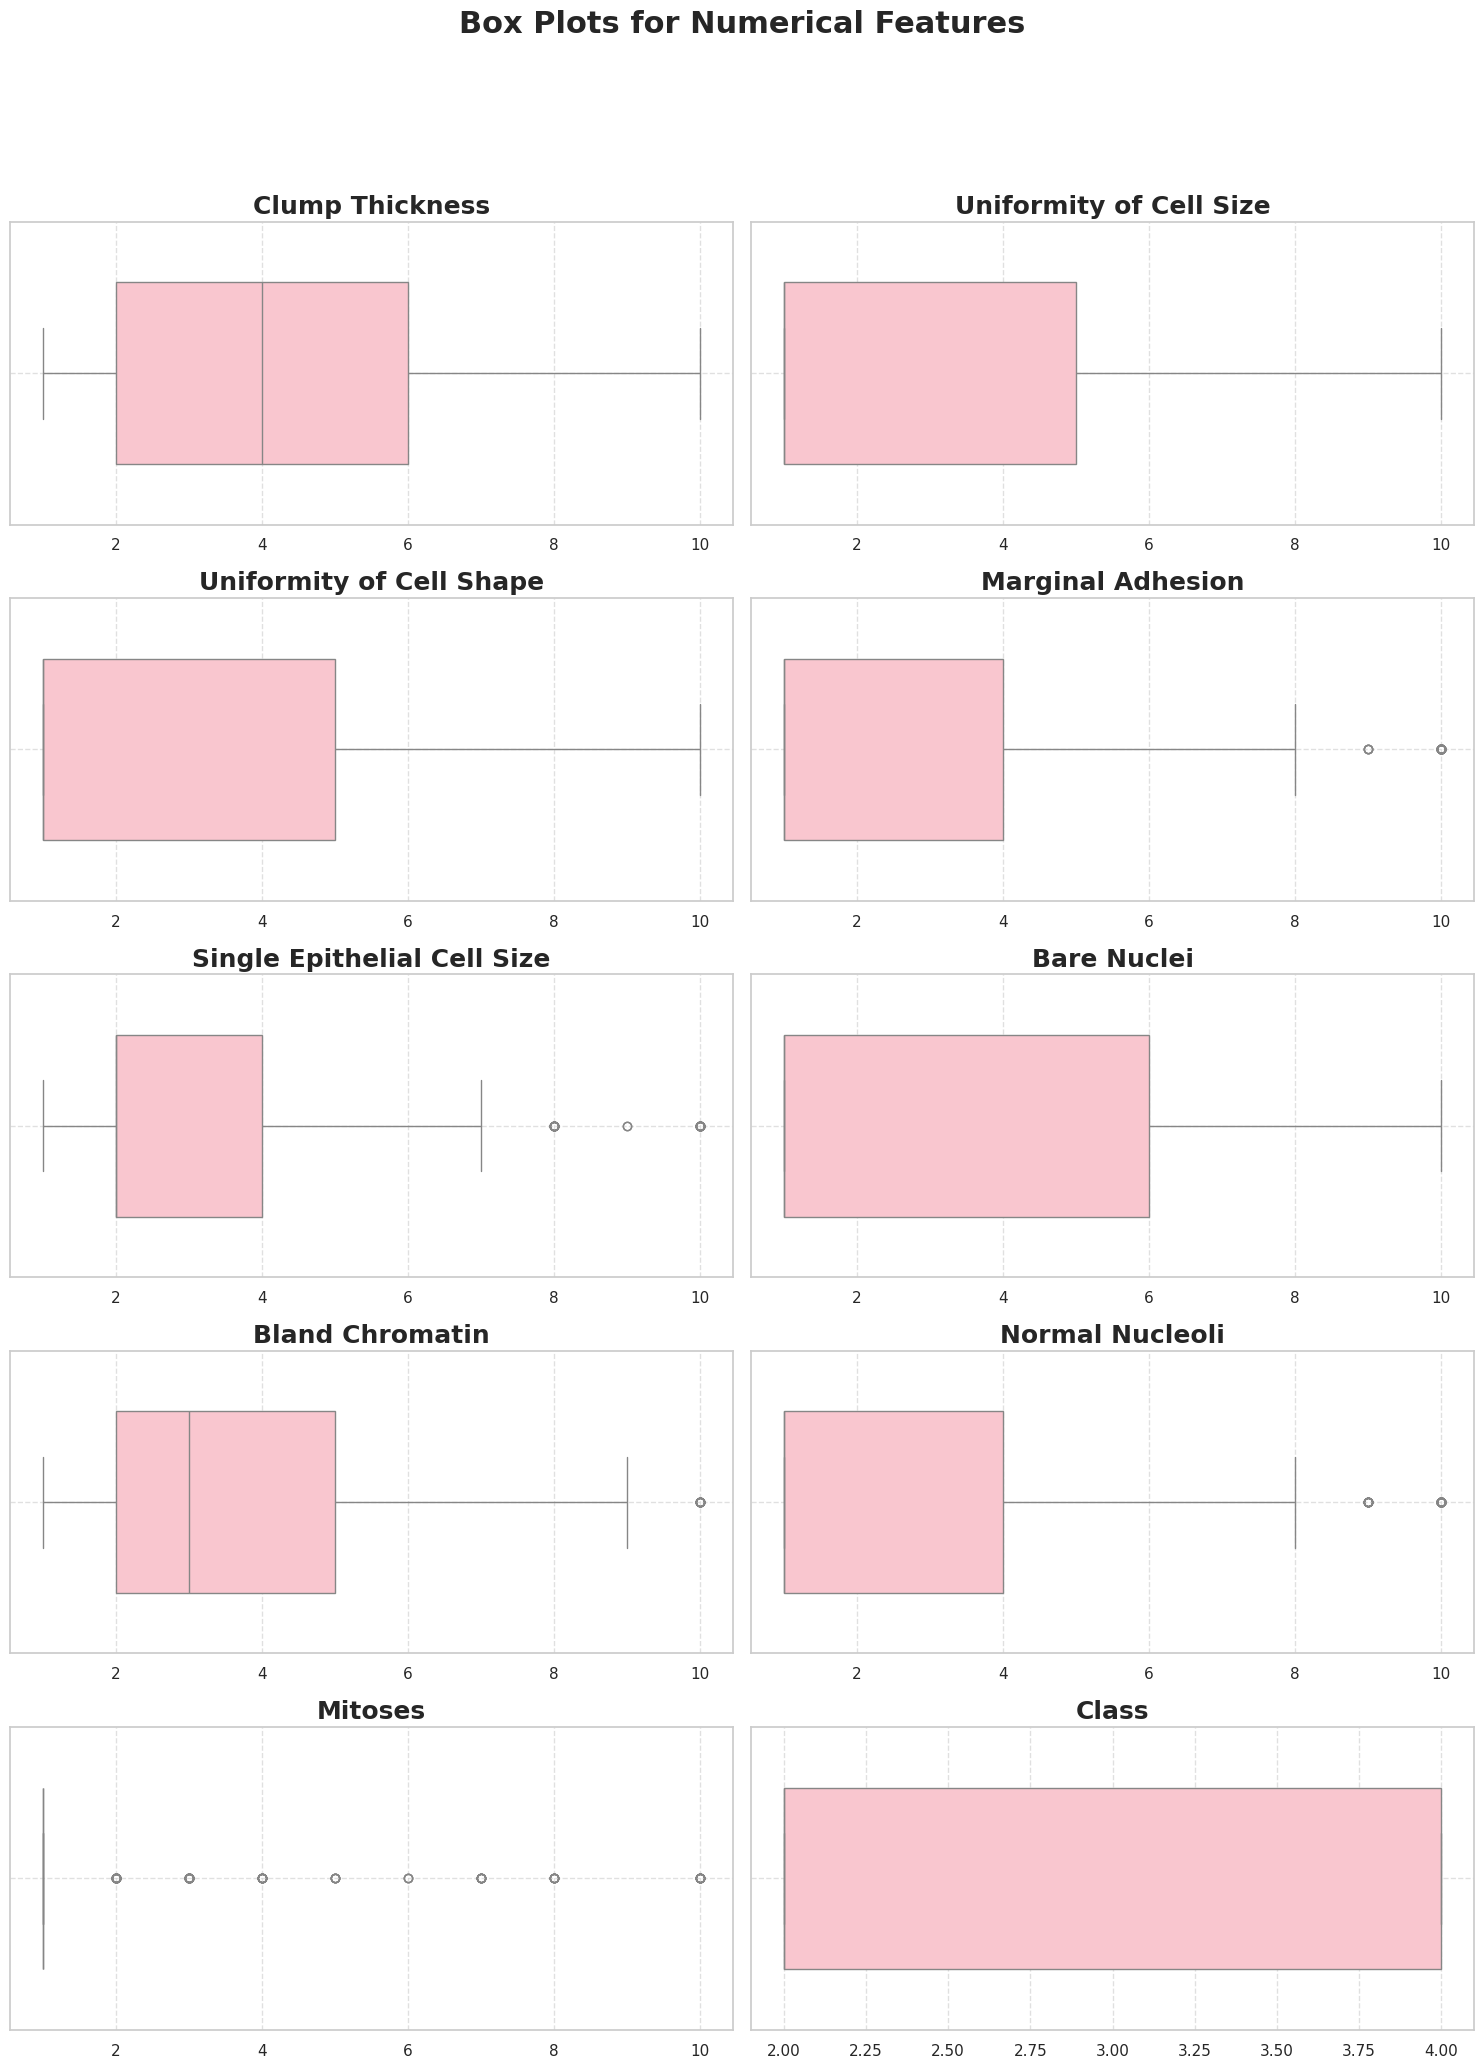

In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(numerical_columns) * 4))  # Adjust size based on the number of features
plt.suptitle('Box Plots for Numerical Features', fontsize=22, fontweight='bold')

# Plot each numerical column as a box plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.boxplot(x=df[col], color='pink', saturation=0.8, width=0.6)
    plt.title(f'{col}', fontsize=18, fontweight='bold')
    plt.xlabel('')  # Remove x-axis label
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Improve layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the title
plt.show()

# Visualizing the correlation matrix using a heatmap:

In [ ]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

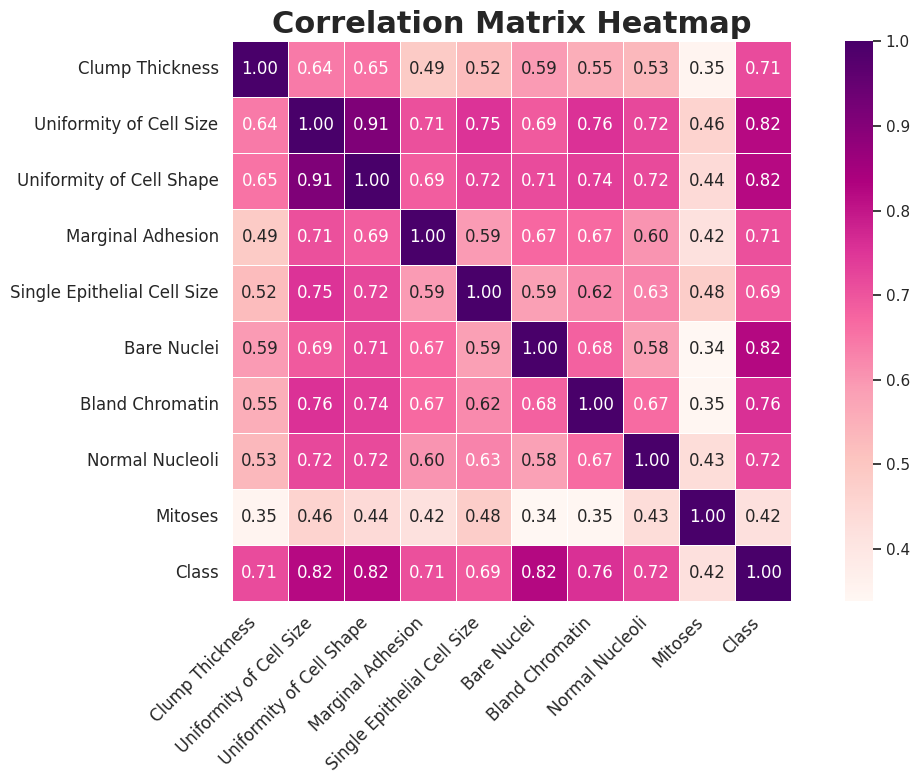

In [ ]:
sns.set(style="white")
plt.figure(figsize=(12, 8))

# Create a custom colormap that emphasizes pink tones
pink_cmap = sns.color_palette("RdPu", as_cmap=True)

# Create the heatmap with the pink colormap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=pink_cmap, linewidths=0.5, linecolor='white', square=True)

# Add title and adjust the layout
plt.title('Correlation Matrix Heatmap', fontsize=22, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the heatmap
plt.show()

# Building a logistic regression model:

In [ ]:
target = 'Class'

# Separate the features (X) and the target variable (y)
X = df.drop(columns=[target])
y = df[target]

# Display the first few rows of X and y to verify
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2        

In [ ]:
# Check the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (683, 9)
Shape of y (target): (683,)


In [ ]:
# Descriptive statistics of the target variable
y.describe()

,Class
count,683.000000
mean,2.699854
std,0.954592
min,2.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,4.000000


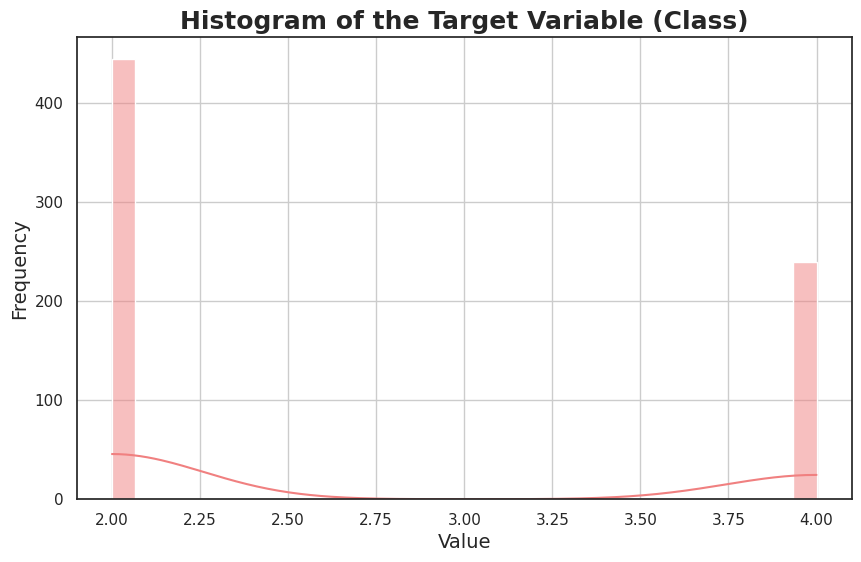

In [ ]:
# Create a histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df[target], kde=True, color='lightcoral', bins=30)
plt.title(f'Histogram of the Target Variable ({target})', fontsize=18, fontweight='bold')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

Here it is shown that target variable has only values 2 or 4.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

# Print the lengths of the training and testing sets
print("Training set length:", len(X_train))
print("Testing set length:", len(X_test))
print("Training labels length:", len(y_train))
print("Testing labels length:", len(y_test))

Training set length: 478
Testing set length: 205
Training labels length: 478
Testing labels length: 205


In [ ]:
# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the accuracy manually
#correct_predictions = sum(predictions == y_test)
#total_predictions = len(y_test)
#accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)

Accuracy: 0.975609756097561


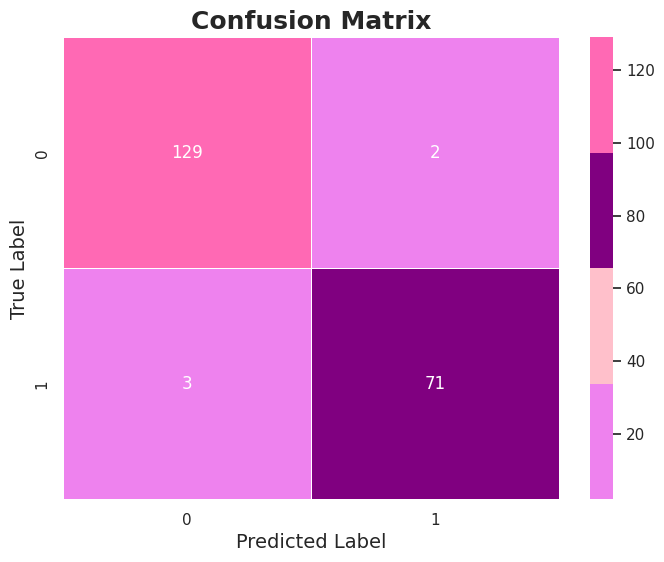

Confusion Matrix:
[[129   2]
 [  3  71]]


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a custom pink colormap
def create_pink_cmap():
    # Define a pink color map
    colors = ['violet', 'pink', 'purple', 'hotpink']
    cmap = sns.color_palette(colors, as_cmap=True)
    return cmap

pink_cmap = create_pink_cmap()

# Create a heatmap of the confusion matrix with the custom pink colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=pink_cmap, linewidths=0.5, linecolor='white')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

* 129 (True Negatives, TN): This is the number of samples  where the true class was 0 and the model also predicted 0.
* 2 (False Positives, FP): This is the number of samples where the true class was 0, but the model predicted 1.
* 3 (False Negatives, FN): This is the number of samples where the true class was 1, but the model predicted 0.
* 71 (True Positives, TP): This is the number of samples where the true class was 1 and the model also predicted 1.



In [ ]:
# Generate the classification report
clr = classification_report(y_test, predictions)

# Print the classification report
print("Classification Report:")
print(clr)

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.96      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



* The model performs excellently for both classes, with very high precision, recall, and F1-scores.
* Class 2 has slightly better performance metrics compared to Class 4, but both classes have strong performance.
* The overall accuracy and average metrics (both macro and weighted) indicate that the model is very effective at distinguishing between the two classes in this dataset.